In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os,sys,inspect, string
import re
import csv
import importlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

In [244]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz
from scipy.interpolate import interp1d
from src.dataset_getters import *
from src.plot_utils import *

In [268]:
set_b = '/home/justyna/WORKSPACE/heartbeat_classification/data/raw/kaggle/set_b/murmur__160_1307100683334_B.wav'
set_a = '/home/justyna/WORKSPACE/heartbeat_classification/data/raw/kaggle/set_a/normal__201106151236.wav'

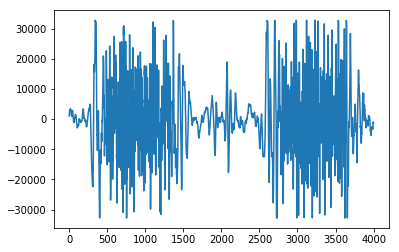

In [269]:
sampling_frequency, signal_b = wavfile.read(set_b)
number_of_samples = len(signal_b)
time_a = np.linspace(0, number_of_samples / sampling_frequency, num=number_of_samples)
plt.plot(signal_b[:sampling_frequency])

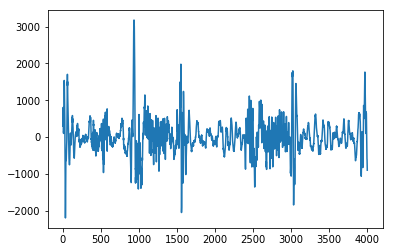

In [270]:
aaaa = '/home/justyna/WORKSPACE/heartbeat_classification/data/raw/physionet/set_a/a0002.wav'
sampling_frequency, signal_b = wavfile.read(aaaa)
number_of_samples = len(signal_b)
time_a = np.linspace(0, number_of_samples / sampling_frequency, num=number_of_samples)
plt.plot(signal_b[:2*sampling_frequency])

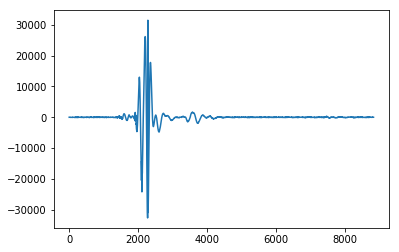

In [276]:
sampling_frequency, signal_a = wavfile.read(set_a)
number_of_samples = len(signal_a)
time_a = np.linspace(0, number_of_samples / sampling_frequency, num=number_of_samples)
plt.plot(signal_a[0:2*(sampling_frequency//10)])

In [ ]:
interp1d(signal_a, signal_b)

In [251]:
interp1d(signal_a, signal_b)

ValueError: x and y arrays must be equal in length along interpolation axis.

In [195]:
positive_values = [sample for sample in signal if sample > 0]
sum(positive_values) / len(positive_values)

681.2480688589716

In [7]:
signal

array([-135,   94,  -18, ...,  -30,  263,   53], dtype=int16)

In [8]:
max(signal)

21860

In [9]:
std = np.std(signal)
6 * std

9920.378244070565

In [10]:
np.std(signal)

1653.3963740117608

In [11]:
filtered_values = [sample for sample in signal if (sample >= -6 *std and sample <= 6 *std)]

In [12]:
signal.reshape(-1,1)

array([[-135],
       [  94],
       [ -18],
       ...,
       [ -30],
       [ 263],
       [  53]], dtype=int16)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor


# Generate train data
X = signal.reshape(-1, 1)

# fit the model
clf = LocalOutlierFactor(n_neighbors=2000)
y_pred = clf.fit_predict(X)

In [82]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [168]:
dir_path = get_kaggle_audio_dir_path('a')
normal_audios = get_random_kaggle_filenames_by_label(5,'normal','a')
path = os.path.join(dir_path, normal_audios[1])

In [187]:
def plot_boxplot_on_square_grid_by_label(set_letter, label, grid_size, figsize):
    indices = list(product(list(range(grid_size)), repeat=2))
    f, ax = plt.subplots(grid_size, grid_size, figsize=(figsize, figsize))
    plt.suptitle(get_set_name(set_letter) + " " + map_label_to_string(label))
    random_filenames = get_random_kaggle_filenames_by_label(grid_size ** 2, label, set_letter)
    for grid_indices, filename in list(zip(indices, random_filenames)):
        path = os.path.join(get_kaggle_audio_dir_path(set_letter), filename)
        plot_boxplot_on_grid(path, ax, grid_indices)
    plt.show()


def plot_boxplot_on_grid(path, grid, grid_coordinates):
    sampling_frequency, signal = wavfile.read(path)
    number_of_samples = len(signal)
    time = np.linspace(0, number_of_samples / sampling_frequency, num=number_of_samples)
    grid[grid_coordinates[0], grid_coordinates[1]].set_title(os.path.basename(path))
    grid[grid_coordinates[0], grid_coordinates[1]].boxplot(signal)

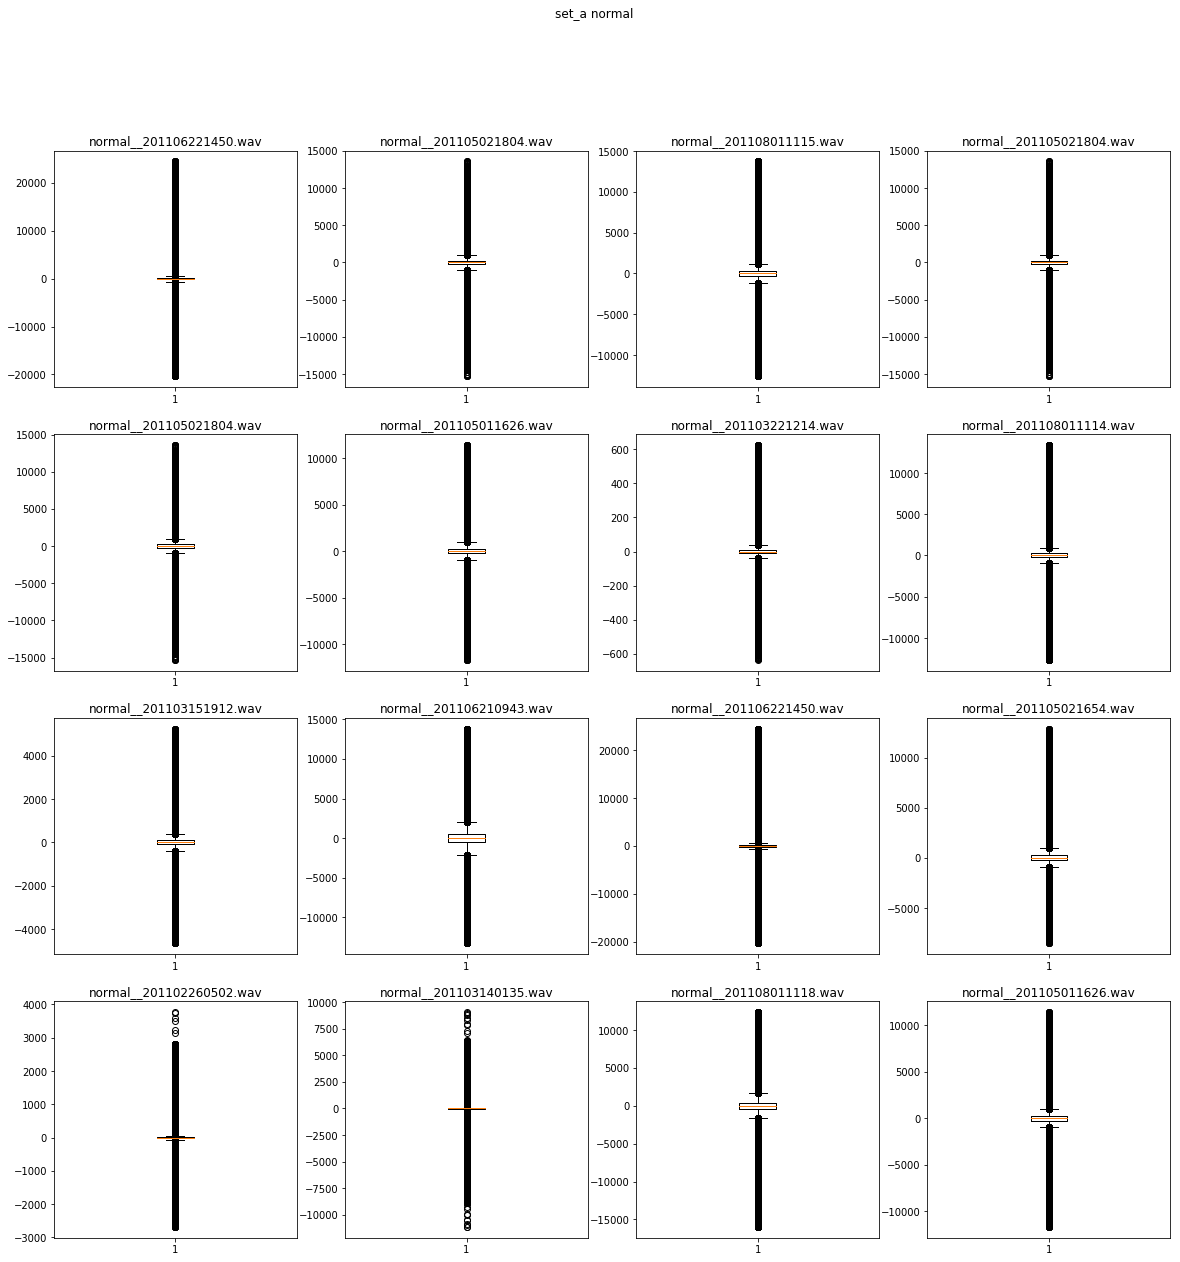

In [192]:
plot_boxplot_on_square_grid_by_label('a', 'normal', 4, 20)

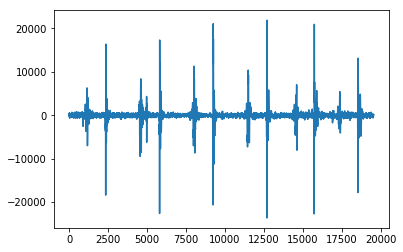

In [212]:
plt.plot(signal)

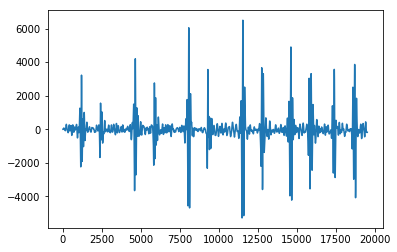

In [213]:
plt.plot(butter_lowpass_filter(signal, 5000, 441000))

In [99]:
import operator
a = operator.index(10)
a

10